# Importing libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import regex as re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.decomposition import TruncatedSVD
import copy


# notebook settings 
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', None)
settings :  { "notebook.output.textLineLimit": 9999 }

In [2]:
df = pd.read_csv('pre-processed2.csv')

df

R_fighter        B_fighter  R_odds  B_odds        R_ev  \
0            Eric Schafer      Jason Brilz   140.0    -160  140.000000   
1            Brandon Vera        Jon Jones   215.0    -235  215.000000   
2       Junior Dos Santos  Gabriel Gonzaga  -250.0     230   40.000000   
3          Alessio Sakara      James Irvin  -120.0     100   83.333333   
4             Mike Pierce    Julio Paulino  -420.0     335   23.809524   
...                   ...              ...     ...     ...         ...   
4534       Misha Cirkunov  Krzysztof Jotko   110.0    -130  110.000000   
4535        Alex Oliveira       Niko Price   170.0    -200  170.000000   
4536  Antonina Shevchenko    Casey O'Neill   215.0    -265  215.000000   
4537        Devonte Smith  Jamie Mullarkey  -155.0     135   64.516129   
4538        Thiago Santos    Johnny Walker  -150.0     130   66.666667   

            B_ev                   location country Winner  title_bout  \
0      62.500000  Broomfield, Colorado, USA     USA   Blue       False   
1      42.553191  Broomfield, Colorado, USA     USA   Blue       False   
2     230.000000  Broomfield, Colorado, USA     USA    Red       False   
3     100.000000  Broomfield, Colorado, USA     USA    Red       False   
4     335.000000  Broomfield, Colorado, USA     USA    Red       False   
...          ...                        ...     ...    ...         ...   
4534   76.923077     Las Vegas, Nevada, USA     USA   Blue       False   
4535   50.000000     Las Vegas, Nevada, USA     USA   Blue       False   
4536   37.735849     Las Vegas, Nevada, USA     USA   Blue       False   
4537  135.000000     Las Vegas, Nevada, USA     USA   Blue       False   
4538  130.000000     Las Vegas, Nevada, USA     USA    Red       False   

           weight_class  gender  no_of_rounds  B_current_lose_streak  \
0     Light Heavyweight    MALE             3                      1   
1     Light Heavyweight    MALE             3                      1   
2           Heavyweight    MALE             3                      0   
3          Middleweight    MALE             3                      1   
4          Welterweight    MALE             3                      0   
...                 ...     ...           ...                    ...   
4534       Middleweight    MALE             3                      1   
4535       Welterweight    MALE             3                      2   
4536  Women's Flyweight  FEMALE             3                      0   
4537        Lightweight    MALE             3                      0   
4538  Light Heavyweight    MALE             5                      0   

      B_current_win_streak  B_draw  B_avg_SIG_STR_landed  B_avg_SIG_STR_pct  \
0                        0       0             31.666667             0.4600   
1                        0       0             39.000000             0.4775   
2                        1       0             13.700000             0.5480   
3                        0       0              5.250000             0.5550   
4                        0       0                   NaN                NaN   
...                    ...     ...                   ...                ...   
4534                     0       0              2.920000             0.4100   
4535                     0       0              5.160000             0.4200   
4536                     2       0              5.480000             0.5600   
4537                     1       0              3.030000             0.4000   
4538                     1       0              3.420000             0.5900   

      B_avg_SUB_ATT  B_avg_TD_landed  B_avg_TD_pct  B_longest_win_streak  \
0          0.666667         1.666667         0.500                     2   
1          0.250000         2.500000         0.525                     3   
2          0.700000         1.200000         0.572                     4   
3          0.125000         0.000000         0.000                     2   
4               NaN              NaN        

In [3]:
# fillna match_weightclass_rank

# for null values >2013 null values will be replaced with rank 16 as they are most likely brand new fighters with no weight class ranking
# for null values before they either need to be dropped or included in the model as they are true nulls since there is not data on them
# for models that can handle nulls I'll include the columns with some data cleaning, but for models that don't have nulls ill drop




In [4]:
# drop fighters

#df.drop(['R_fighter','B_fighter'],axis=1,inplace=True)

# EDA 

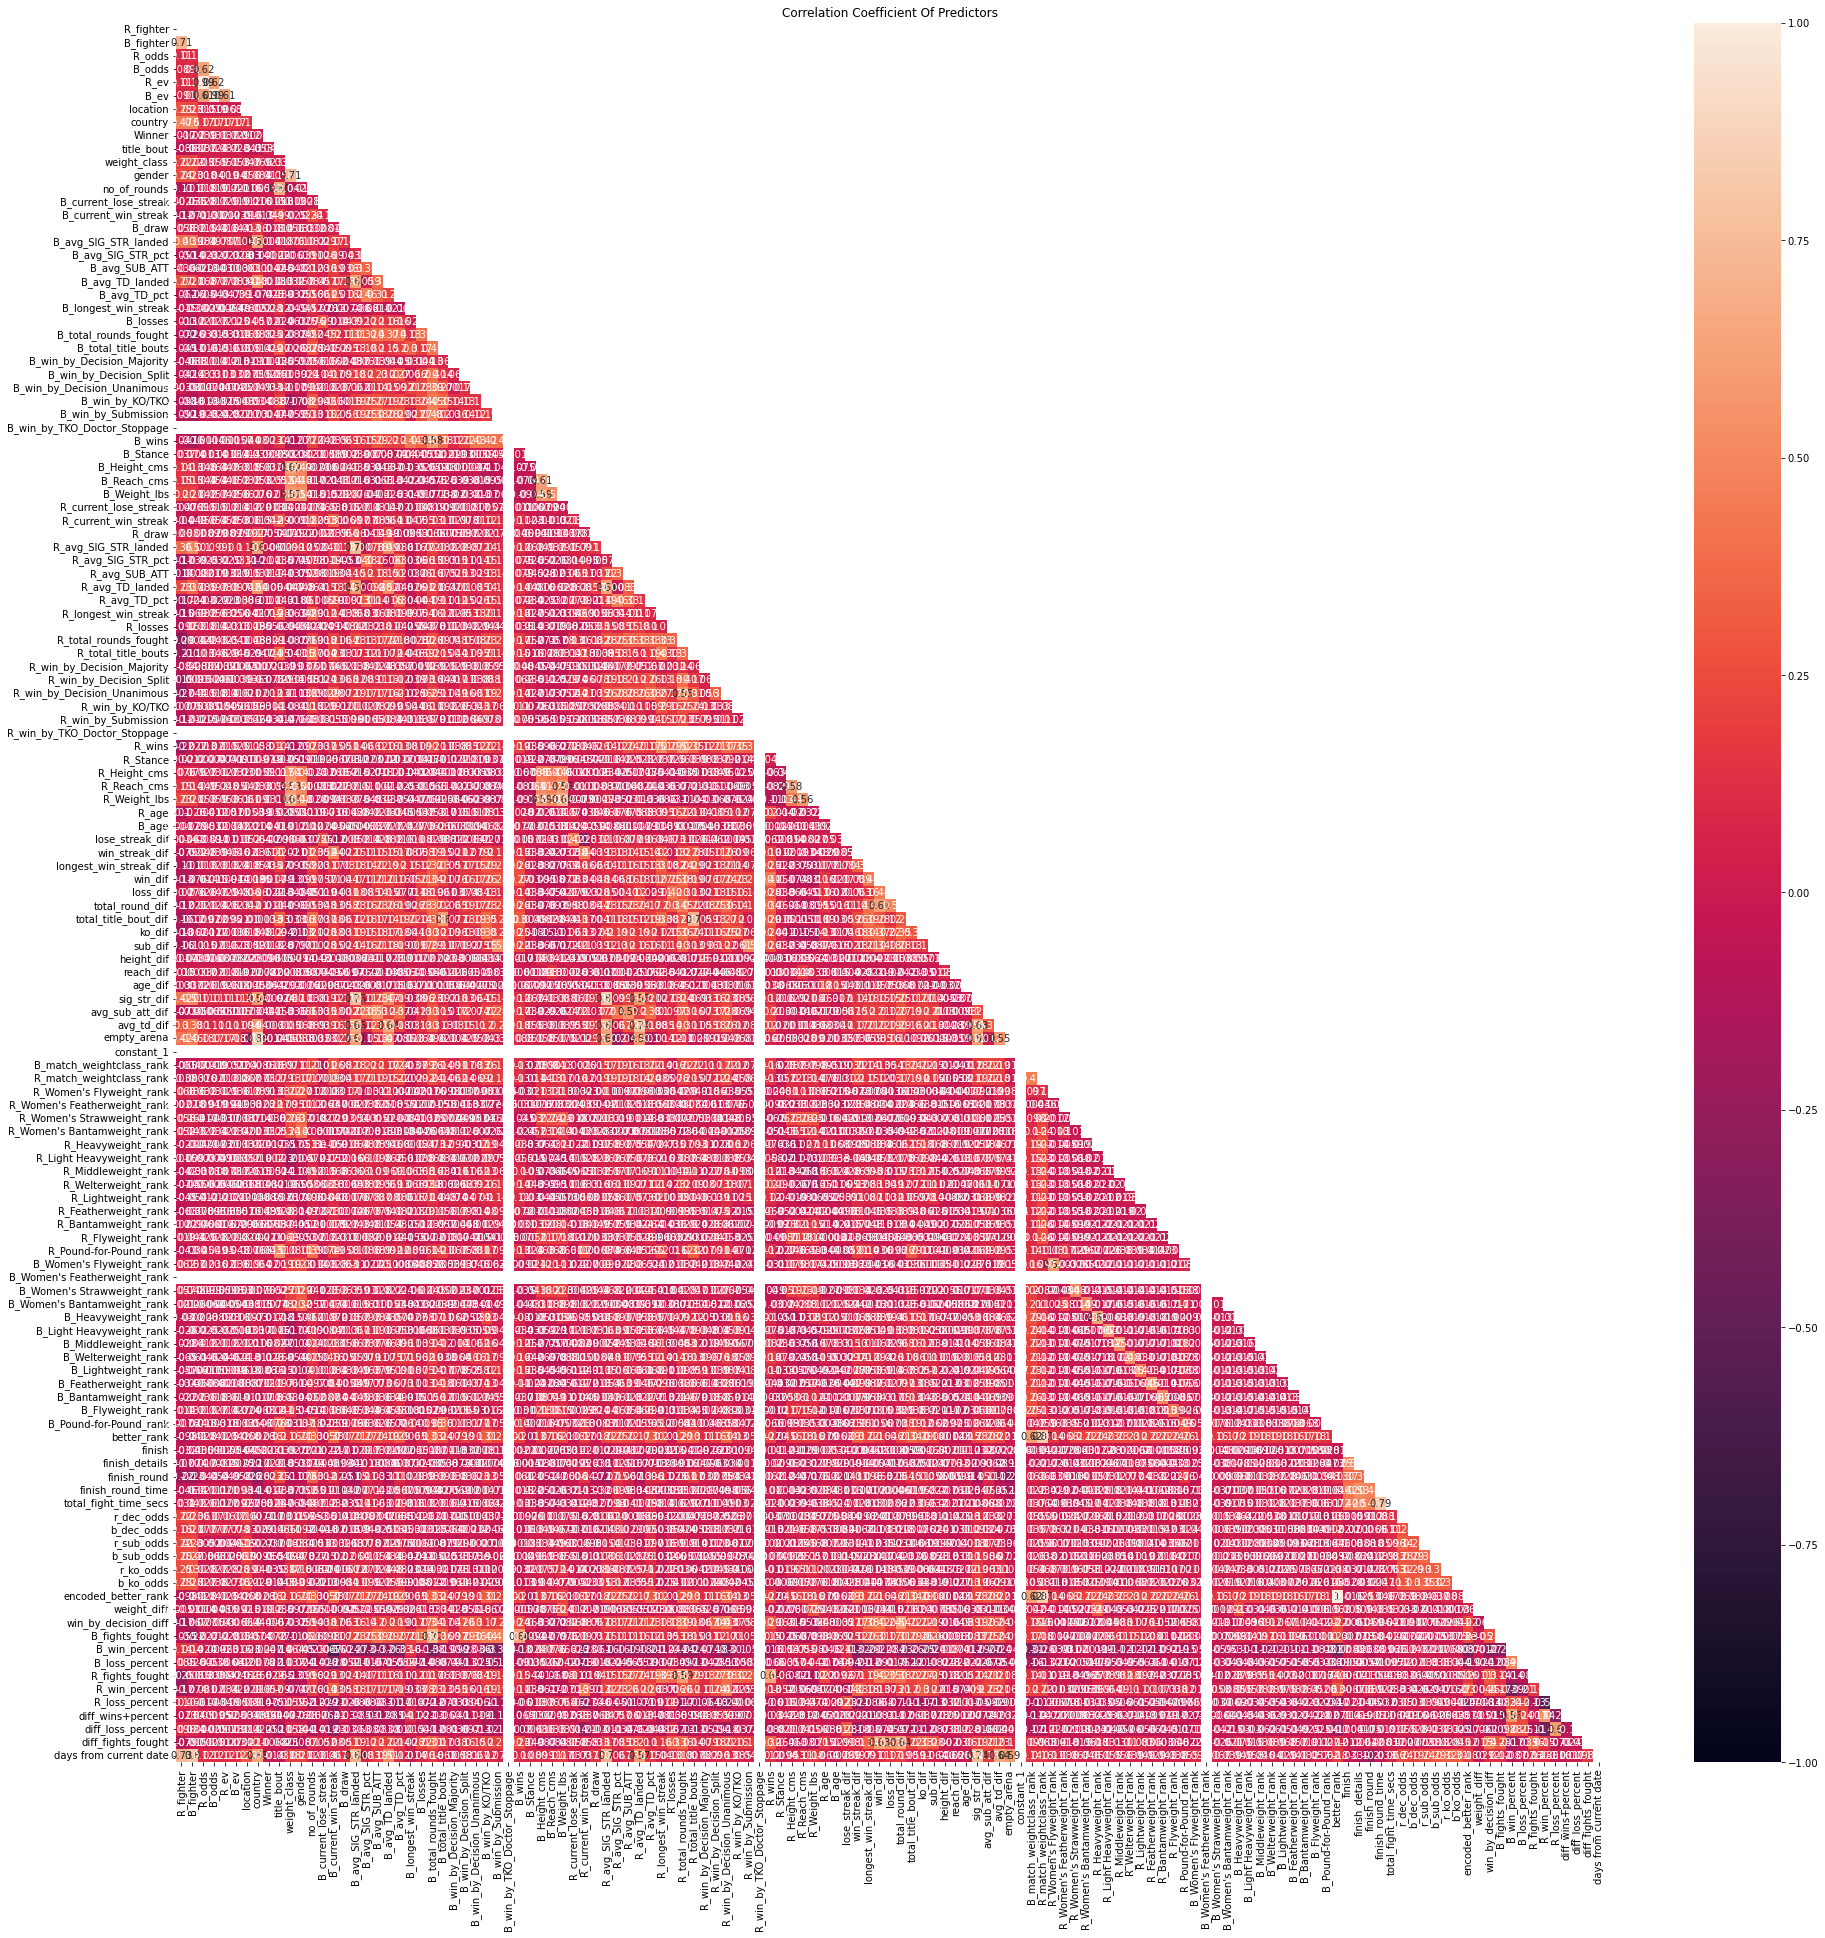

In [5]:
# correlation

# set figure size
plt.figure(figsize=(32,32))

# generate correlation
# use .factorize() to turn categorical variables into numeric in order to properly perform it

correlation = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# generate heatmap
sns.heatmap(correlation, annot=True, mask=mask, vmin=-1, vmax=1)

#sns.heatmap(correlation, annot=True, vmin=-1, vmax=1) # without mask it shows the whole thing

plt.title('Correlation Coefficient Of Predictors')
plt.show()


In [6]:
# highest postively correlated features

sol = (correlation.where(np.triu(np.ones(correlation.shape), k=1)
                 .astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
print(sol[0:25])


better_rank               encoded_better_rank       1.000000
R_odds                    R_ev                      0.990510
B_odds                    B_ev                      0.989433
country                   empty_arena               0.832098
R_match_weightclass_rank  encoded_better_rank       0.828822
                          better_rank               0.828822
R_avg_SIG_STR_landed      sig_str_dif               0.811572
B_fighter                 days from current date    0.799703
finish_round_time         total_fight_time_secs     0.789736
B_avg_SIG_STR_landed      sig_str_dif               0.756859
R_avg_TD_landed           avg_td_dif                0.744496
sig_str_dif               days from current date    0.738538
B_avg_SIG_STR_landed      R_avg_SIG_STR_landed      0.729844
R_fighter                 days from current date    0.727292
B_total_rounds_fought     B_fights_fought           0.720821
R_fighter                 B_fighter                 0.714924
weight_class            

In [7]:
#most negatively correlated features

print(sol[-25:])


R_fighter                    R_win_by_Decision_Unanimous   -0.273409
R_current_win_streak         lose_streak_dif               -0.275185
country                      finish_round                  -0.276570
B_current_win_streak         B_loss_percent                -0.284088
R_current_win_streak         B_win_percent                 -0.284123
B_win_by_Decision_Split      B_win_percent                 -0.284388
B_fights_fought              B_win_percent                 -0.285412
longest_win_streak_dif       B_win_percent                 -0.286433
R_loss_percent               diff_wins+percent             -0.288485
R_fighter                    R_total_rounds_fought         -0.290680
B_win_by_KO/TKO              B_win_percent                 -0.298781
B_avg_SIG_STR_pct            B_win_percent                 -0.302179
B_avg_SUB_ATT                B_win_percent                 -0.303674
R_win_by_Decision_Unanimous  B_win_percent                 -0.303880
B_match_weightclass_rank     B_win

# Baseline

In [8]:
#create copy of df

b_df=copy.deepcopy(df)

In [9]:
df.isnull().sum()

R_fighter                 0
B_fighter                 0
R_odds                    1
B_odds                    0
R_ev                      1
                         ..
R_loss_percent            0
diff_wins+percent         0
diff_loss_percent         0
diff_fights_fought        0
days from current date    0
Length: 131, dtype: int64

In [10]:
# dropping the nulls because there are few

b_df.dropna(subset=['R_odds','R_ev'],axis=0,inplace=True)

In [11]:
# drop column because there is a lot of nulls here

b_df.drop(columns=['constant_1','B_match_weightclass_rank','R_match_weightclass_rank','encoded_better_rank'], axis=1,inplace=True)

In [12]:
# get dummies for every column except finish

b_df=pd.get_dummies(b_df.loc[:, b_df.columns != 'finish'], drop_first=True)

# finish will be target variable so we don't want the finish to have k-1 ohe

temp=pd.get_dummies(df.loc[:, df.columns == 'finish'], drop_first=False)

# join them

b_df=b_df.join(temp)

b_df=b_df.join(df[['finish']])


In [228]:
b_df[['days from current date','Winner_Red']].groupby('days from current date').count().size

428

In [229]:
# use this data for train test split

b_df[['days from current date','Winner_Red']].groupby('days from current date').count().sum()[0]

4538

## Train/test split & target/feature selection

In [255]:

# split 90% of the fights
from ctypes import wintypes


train_count=round(b_df[['days from current date','Winner_Red']].groupby('days from current date').count().sum()[0]*0.9)+1

#train test split
train=b_df.iloc[:train_count]

test=b_df.iloc[train_count:]

#win_type

wintype_train=train.copy()

wintype_test=test.copy()

In [270]:
# drop nulls in wintype_train

wintype_train=wintype_train[~wintype_train['finish'].isnull()]



In [127]:
# train test split
# these are days from current date	sensitive so I am using the 5 of the most recent events
# this dataset uses data from 2021 so the 600 days from now is not accurate

#test = b_df[(b_df['days from current date'] <605)]

#train = b_df[(b_df['days from current date'] >605) ]

In [231]:
# create target

target_test = test[['finish_round','Winner_Red','finish_M-DEC','finish_S-DEC','finish_SUB','finish_U-DEC']]

target_train = train[['finish_round','Winner_Red','finish_M-DEC','finish_S-DEC','finish_SUB','finish_U-DEC']]

In [232]:
# predictor with odds

#might need to drop: 'r_dec_odds', 'b_dec_odds', 'r_sub_odds', 'b_sub_odds', 'r_ko_odds', 'b_ko_odds'

f_predictor_test = test.drop(['finish_round','Winner_Red','finish_M-DEC','finish_S-DEC','finish_SUB','finish_U-DEC'], axis=1, inplace=False)

f_predictor_train = train.drop(['finish_round','Winner_Red','finish_M-DEC','finish_S-DEC','finish_SUB','finish_U-DEC'], axis=1, inplace=False)

# predictor with no odds

n_predictor_test = test[['diff_loss_percent','diff_fights_fought','diff_wins+percent','days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw','better_rank_Red','better_rank_neither',]]

n_predictor_train = train[['diff_loss_percent','diff_fights_fought','diff_wins+percent','days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw','better_rank_Red','better_rank_neither',]]

In [ ]:
'B_win_by_Decision_Unanimous','B_win_by_Decision_Split','B_win_by_Decision_Majority','B_win_by_Submission','B_win_by_KO/TKO',

In [271]:
wintype_predictor_test = wintype_test[['B_win_by_Decision_Unanimous','B_win_by_Decision_Split','B_win_by_Decision_Majority','B_win_by_Submission','B_win_by_KO/TKO','diff_loss_percent','diff_fights_fought','diff_wins+percent','days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw','better_rank_Red','better_rank_neither',]]

wintype_predictor_train = wintype_train[['B_win_by_Decision_Unanimous','B_win_by_Decision_Split','B_win_by_Decision_Majority','B_win_by_Submission','B_win_by_KO/TKO','diff_loss_percent','diff_fights_fought','diff_wins+percent','days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw','better_rank_Red','better_rank_neither',]]

In [234]:
n_predictor_train

diff_loss_percent  diff_fights_fought  diff_wins+percent  \
0                   0.0                   3               -1.0   
1                   0.0                   7                0.0   
2                   0.0                  -6                0.0   
3                   0.0                   2                0.0   
4                   0.0                   2                0.0   
...                 ...                 ...                ...   
4080                0.0                  -2                0.0   
4081                0.0                  -2                0.0   
4082                0.0                  -3                1.0   
4083                0.0                   5                0.0   
4084                0.0                   5                0.0   

      days from current date  title_bout  lose_streak_dif  win_streak_dif  \
0                       4584       False                0               0   
1                       4584       False                0               0   
2                       4584       False                0              -3   
3                       4584       False               -1              -2   
4                       4584       False                1               0   
...                      ...         ...              ...             ...   
4080                     714       False                0               1   
4081                     714       False                0               1   
4082                     714       False                1              -4   
4083                     714       False                0               2   
4084                     714        True                0              -8   

      longest_win_streak_dif  win_dif  loss_dif  total_round_dif  \
0                          0       -1         2               -1   
1                         -1       -4         3              -14   
2                          0        3        -3               10   
3                          0       -1         1               -5   
4                         -1       -1         1               -6   
...                      ...      ...       ...              ...   
4080                      -1        1         1                6   
4081                       1        1         1                3   
4082                      -2        0         3                4   
4083                      -6       -6         1              -22   
4084                      -8       -7         2              -19   

      total_title_bout_dif  ko_dif  sub_dif  height_dif  reach_dif  age_dif  \
0                        0       0       -2      -10.16     -10.16       -2   
1                        0      -4        0        2.54      20.32       10   
2                        1       1        2       -5.08      -2.54       -4   
3                        0       0        0        5.08       7.62       -3   
4                        0       0        0       10.16       7.62       -5   
...                    ...     ...      ...         ...        ...      ...   
4080                     0       0       -2        2.54      -2.54        2   
4081                     0       1        0        7.62      10.16        6   
4082                     0       0        0       -5.08       0.00       -2   
4083                    -2       0        0       -2.54      10.16        7   
4084                    -2       3       -4        2.54       0.00       -1   

      sig_str_dif  avg_sub_att_dif  avg_td_dif  weight_diff  \
0       16.000000        -0.666667    0.833333          -20   
1        8.272727         0.159091    1.954545           25   
2      -12.050000         0.700000    1.200000           -4   
3      -15.550000         0.125000   -1.000000          -20   
4      -40.500000         0.000000   -3.500000            0   
...           ...              ...         ...          ...   
4080    -1.270000        -0.500000   -0.520000            0   
4081     3.470000 

## Models

### Winner_red

winner red is the dummy variable of Red winning (0 means blue won)

#### Baseline - Logistic Regression

In [24]:
#some target variable exploration

target_train['Winner_Red'].describe()

count    4085.000000
mean        0.586781
std         0.492472
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Winner_Red, dtype: float64

In [25]:
target_train.groupby(['Winner_Red'])['Winner_Red'].count()

Winner_Red
0    1688
1    2397
Name: Winner_Red, dtype: int64

In [26]:
print(1733/(1733+2470))
print(2470/(1733+2470))

0.4123245300975494
0.5876754699024507


In [27]:
1733/(1733+2470)

0.4123245300975494

In [28]:
target_test.groupby(['Winner_Red'])['Winner_Red'].count()

Winner_Red
0    193
1    260
Name: Winner_Red, dtype: int64

In [29]:
print(n_predictor_train.shape
)
print(target_train['Winner_Red'].shape)


print(target_test['Winner_Red'].shape)

(4085, 41)
(4085,)
(453,)


In [50]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(C=0.5))

pipe.fit(n_predictor_train, target_train['Winner_Red'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.5))])

In [51]:
pipe.score(n_predictor_test, target_test['Winner_Red'])

0.5496688741721855

#### Xgboost

In [32]:
# testing 

parameters = {"learning_rate":[0.1,0.07,0.05,0.01,0.15,0.2], 'max_depth':[5,7,9,12,15],'alpha':[2,5,8,10],}

gridsearch = GridSearchCV(xgb.XGBClassifier(eval_metric='mlogloss'), parameters)


pipe = make_pipeline(StandardScaler(), gridsearch)

pipe.fit(n_predictor_train, target_train['Winner_Red'])

pipe.score(n_predictor_test, target_test['Winner_Red'])

KeyboardInterrupt: 

In [52]:
# testing 

xg_reg = xgb.XGBClassifier(learning_rate = 0.1,
                max_depth = 9,n_estimators = 2500, alpha=5)

pipe = make_pipeline(StandardScaler(), xg_reg)

pipe.fit(n_predictor_train, target_train['Winner_Red'])

pipe.score(n_predictor_test, target_test['Winner_Red'])

[22:40:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6070640176600441

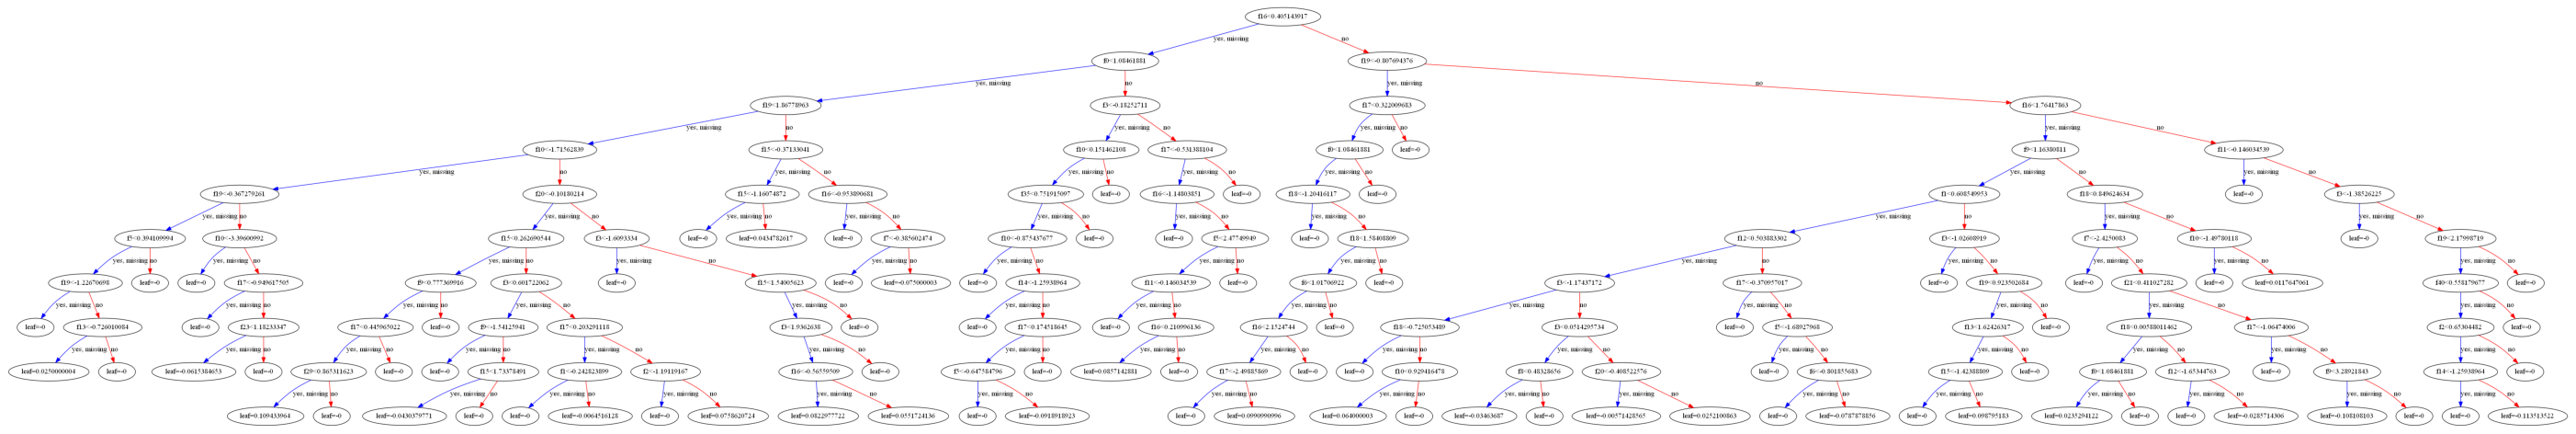

In [53]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 500]
plt.show()

##### Testing removing some features for XGboost

I wanted to do some testing on features selection and see wether removing some features will lead to better performance

In [37]:
''''B_fights_fought',
       'B_win_percent', 'B_loss_percent', 'R_fights_fought', 'R_win_percent',
       'R_loss_percent', 'diff_wins+percent', 'diff_loss_percent',
       'diff_fights_fought', 'days from current date'''

"'B_fights_fought',\n       'B_win_percent', 'B_loss_percent', 'R_fights_fought', 'R_win_percent',\n       'R_loss_percent', 'diff_wins+percent', 'diff_loss_percent',\n       'diff_fights_fought', 'days from current date"

In [83]:
temp_n_predictor_test = test[['diff_loss_percent','days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff','gender_MALE','better_rank_Red','better_rank_neither','diff_fights_fought','diff_wins+percent']]

temp_n_predictor_train = train[['diff_loss_percent','days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'gender_MALE','better_rank_Red','better_rank_neither','diff_fights_fought','diff_wins+percent']]

In [84]:
temp_n_predictor_test

diff_loss_percent  days from current date  title_bout  lose_streak_dif  \
4085               -1.0                     711       False                1   
4086               -1.0                     711       False                0   
4087                0.0                     711       False                0   
4088                1.0                     704       False                3   
4089                0.0                     704       False                0   
...                 ...                     ...         ...              ...   
4534                0.0                     368       False                0   
4535                0.0                     368       False                0   
4536                0.0                     368       False               -1   
4537               -1.0                     368       False                0   
4538                0.0                     368       False               -3   

      win_streak_dif  longest_win_streak_dif  win_dif  loss_dif  \
4085              -2                       0        1         4   
4086               0                      -1        1         5   
4087              -3                      -3       -5        -4   
4088              -1                       2        2         1   
4089               0                       0        0         0   
...              ...                     ...      ...       ...   
4534               0                       1        3         1   
4535               0                      -2       -5        -3   
4536               2                       0       -2        -3   
4537               0                      -2       -3         1   
4538               1                       0       -8        -6   

      total_round_dif  total_title_bout_dif  ko_dif  sub_dif  height_dif  \
4085               14                     0       0        0        0.00   
4086                0                     0       4        0       -5.08   
4087              -27                     0      -2        0       -2.54   
4088                5                     0       0        1        2.54   
4089                0                     0       0        0       -5.08   
...               ...                   ...     ...      ...         ...   
4534               25                     0       0       -5       -5.08   
4535              -20                     0       0       -1        2.54   
4536              -12                     0      -1        0       -5.08   
4537                1                     0      -3        0        7.62   
4538              -32                    -1      -7        0       10.16   

      reach_dif  age_dif  sig_str_dif  avg_sub_att_dif  avg_td_dif  \
4085      -7.62       10        -1.24             -0.4        1.56   
4086      -7.62        5        -1.68              0.0       -0.40   
4087      -5.08       -8        -3.88              0.0       -1.14   
4088      10.16        0        -0.07              0.2       -0.06   
4089      -7.62       -3         1.73              0.0        0.00   
...         ...      ...          ...              ...         ...   
4534       0.00       -2        -0.85             -1.6       -3.33   
4535       0.00       -1         2.19              0.3       -1.48   
4536       5.08      -13         1.59              0.9        3.32   
4537      -5.08       -1        -2.07             -0.1        2.97   
4538      15.24       -8        -0.53              0.6       -0.37   

      weight_diff  win_by_decision_diff  gender_MALE  better_rank_Red  \
4085            0                    -1            1                0   
4086            0                     3            1                1   
4087            0                     3            0                1   
4088            0                    -1            1                0   
4089            0                     0            1                0   
...           ...                   ...         

In [92]:
xg_reg = xgb.XGBClassifier(learning_rate = 0.1,
                max_depth = 5,n_estimators = 2500, alpha=4)

pipe = make_pipeline(StandardScaler(), xg_reg)

pipe.fit(temp_n_predictor_train, target_train['Winner_Red'])

pipe.score(temp_n_predictor_test, target_test['Winner_Red'])

[22:54:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5916114790286976

Removing the features resulted in slightly worse performances. However less featues measns the model is less computationally expensive and it is less prone to overfitting, which in certain cases is favoured

#### SVM

In [54]:
from sklearn import svm

# baseline linear model

model = svm.SVC(kernel='linear')

pipe = make_pipeline(StandardScaler(), model)

pipe.fit(n_predictor_train, target_train['Winner_Red'])

pipe.score(n_predictor_test, target_test['Winner_Red'])

0.5783664459161147

In [ ]:

# poly model

model = svm.SVC(kernel='poly',degree=25)

pipe = make_pipeline(
    StandardScaler(), 
    model)

pipe.fit(n_predictor_train, target_train['Winner_Red'])

pipe.score(n_predictor_test, target_test['Winner_Red'])

0.5894039735099338

#### Perceptron

In [55]:
from sklearn.linear_model import Perceptron

model = Perceptron()

pipe = make_pipeline(
    StandardScaler(), 
    model)

pipe.fit(n_predictor_train, target_train['Winner_Red'])

pipe.score(n_predictor_test, target_test['Winner_Red'])


0.5629139072847682

In [82]:
model = Perceptron(penalty='l2', alpha=0.01)

pipe = make_pipeline(
    StandardScaler(), 
    model)

pipe.fit(n_predictor_train, target_train['Winner_Red'])

pipe.score(n_predictor_test, target_test['Winner_Red'])

0.609271523178808

In [109]:
# model with less features

model = Perceptron(penalty='l2', alpha=0.009)

pipe = make_pipeline(
    StandardScaler(), 
    model)

pipe.fit(temp_n_predictor_train, target_train['Winner_Red'])

pipe.score(temp_n_predictor_test, target_test['Winner_Red'])

0.6048565121412803

### Type of Win prediction

In [306]:
wintype_train[['finish']].head()

finish
0   U-DEC
1  KO/TKO
2  KO/TKO
3  KO/TKO
4   U-DEC

In [307]:
wintype_predictor_train.head()

B_win_by_Decision_Unanimous  B_win_by_Decision_Split  \
0                            1                        0   
1                            2                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   B_win_by_Decision_Majority  B_win_by_Submission  B_win_by_KO/TKO  \
0                           0                    0                1   
1                           0                    1                0   
2                           0                    2                5   
3                           0                    0                3   
4                           0                    0                0   

   diff_loss_percent  diff_fights_fought  diff_wins+percent  \
0                0.0                   3               -1.0   
1                0.0                   7                0.0   
2                0.0                  -6                0.0   
3                0.0                   2                0.0   
4                0.0                   2                0.0   

   days from current date  title_bout  lose_streak_dif  win_streak_dif  \
0                    4584       False                0               0   
1                    4584       False                0               0   
2                    4584       False                0              -3   
3                    4584       False               -1              -2   
4                    4584       False                1               0   

   longest_win_streak_dif  win_dif  loss_dif  total_round_dif  \
0                       0       -1         2               -1   
1                      -1       -4         3              -14   
2                       0        3        -3               10   
3                       0       -1         1               -5   
4                      -1       -1         1               -6   

   total_title_bout_dif  ko_dif  sub_dif  height_dif  reach_dif  age_dif  \
0                     0       0       -2      -10.16     -10.16       -2   
1                     0      -4        0        2.54      20.32       10   
2                     1       1        2       -5.08      -2.54       -4   
3                     0       0        0        5.08       7.62       -3   
4                     0       0        0       10.16       7.62       -5   

   sig_str_dif  avg_sub_att_dif  avg_td_dif  weight_diff  \
0    16.000000        -0.666667    0.833333          -20   
1     8.272727         0.159091    1.954545           25   
2   -12.050000         0.700000    1.200000           -4   
3   -15.550000         0.125000   -1.000000          -20   
4   -40.500000         0.000000   -3.500000            0   

   win_by_decision_diff  weight_class_Catch Weight  \
0                    -1                          0   
1                     0                          0   
2                     0                          0   
3                     2                          0   
4                     1                          0   

   weight_class_Featherweight  weight_class_Flyweight  \
0                           0                       0   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   

   weight_class_Heavyweight  weight_class_Light Heavyweight  \
0                         0                               1   
1                         0                               1   
2                         1                               0   
3                         0                               0   
4                         0                               0   

   weight_class_Lightweight  weight_class_Middleweight  \
0                         0                          0   
1                        

##### Baseline - Logistic Regression

In [274]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(C=0.5))

pipe.fit(wintype_predictor_train, wintype_train['finish'])

pipe.score(wintype_predictor_test, wintype_test['finish'])

0.423841059602649

##### xgboost

In [287]:
xg_reg = xgb.XGBClassifier(learning_rate = 0.01)

pipe = make_pipeline(StandardScaler(), xg_reg)

pipe.fit(wintype_predictor_train, wintype_train['finish'])

pipe.score(wintype_predictor_test, wintype_test['finish'])

[15:05:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.4260485651214128

##### Perceptron 

In [302]:
model = Perceptron(penalty='l2', alpha=0.1)

pipe = make_pipeline(
    StandardScaler(), 
    model)

pipe.fit(wintype_predictor_train, wintype_train['finish'])

pipe.score(wintype_predictor_test, wintype_test['finish'])

0.40397350993377484

### Rounds 

In [ ]:
# train test split


#dropna
temp = b_df.dropna(subset=['finish_round'])

#train test

test = temp[(temp['days from current date'] < 800)]

train = temp[(temp['days from current date'] > 800)]

# X/Y

X_test = test[['days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw']]

X_train = train[['days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw']]




In [ ]:
target_test

finish_round  Winner_Red  finish_M-DEC  finish_S-DEC  finish_SUB  \
4085           NaN           1             0             0           1   
4086           NaN           1             0             0           0   
4087           NaN           1             0             0           1   
4088           NaN           1             0             0           0   
4089           NaN           0             0             0           1   
...            ...         ...           ...           ...         ...   
4534           3.0           0             0             1           0   
4535           3.0           0             0             0           0   
4536           2.0           0             0             0           0   
4537           2.0           0             0             0           0   
4538           5.0           1             0             0           0   

      finish_U-DEC  
4085             0  
4086             0  
4087             0  
4088             0  
4089             0  
...            ...  
4534             0  
4535             1  
4536             0  
4537             0  
4538             1  

[453 rows x 6 columns]

In [ ]:
# model

pipe = make_pipeline(StandardScaler(), linear_model.Lasso(alpha=0.1))

pipe.fit(X_train, train['finish_round'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1))])

In [ ]:
pipe.score(X_test, test['finish_round'])

0.02287253327504224

# Random stuff

In [ ]:
train.columns

Index(['R_odds', 'B_odds', 'R_ev', 'B_ev', 'title_bout', 'lose_streak_dif',
       'win_streak_dif', 'longest_win_streak_dif', 'win_dif', 'loss_dif',
       'total_round_dif', 'total_title_bout_dif', 'ko_dif', 'sub_dif',
       'height_dif', 'reach_dif', 'age_dif', 'sig_str_dif', 'avg_sub_att_dif',
       'avg_td_dif', 'finish_round', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds',
       'b_sub_odds', 'r_ko_odds', 'b_ko_odds', 'weight_diff',
       'win_by_decision_diff', 'B_fights_fought', 'B_win_percent',
       'B_loss_percent', 'R_fights_fought', 'R_win_percent', 'R_loss_percent',
       'diff_wins+percent', 'diff_loss_percent', 'diff_fights_fought',
       'days from current date', 'Winner_Red', 'weight_class_Catch Weight',
       'weight_class_Featherweight', 'weight_class_Flyweight',
       'weight_class_Heavyweight', 'weight_class_Light Heavyweight',
       'weight_class_Lightweight', 'weight_class_Middleweight',
       'weight_class_Welterweight', 'weight_class_Women's Bantamweight

In [ ]:
# odds 

'R_odds', 'B_odds', 'R_ev', 'B_ev', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds', 'b_sub_odds', 'r_ko_odds', 'b_ko_odds',



('R_odds',
 'B_odds',
 'R_ev',
 'B_ev',
 'r_dec_odds',
 'b_dec_odds',
 'r_sub_odds',
 'b_sub_odds',
 'r_ko_odds',
 'b_ko_odds')

In [ ]:
# should maybe drop this

b_df[['total_title_bout_dif']].describe()

total_title_bout_dif
count           4538.000000
mean              -0.274350
std                1.492279
min              -14.000000
25%                0.000000
50%                0.000000
75%                0.000000
max               14.000000

In [ ]:
# shouldn't drop this one as there is a mena and all 


b_df[['total_round_dif']].describe()

total_round_dif
count      4538.000000
mean         -5.088585
std          16.440999
min        -448.000000
25%         -11.000000
50%          -3.000000
75%           2.000000
max          80.000000

train test split

In [43]:
# show 5th column


b_df.iloc[:, 0:63]

title_bout  no_of_rounds  B_current_lose_streak  B_current_win_streak  \
0       False             3                      1                     0   
1       False             3                      1                     0   
2       False             3                      0                     1   
3       False             3                      1                     0   
4       False             3                      0                     0   

   B_draw  B_avg_SIG_STR_landed  B_avg_SIG_STR_pct  B_avg_SUB_ATT  \
0       0             31.666667             0.4600       0.666667   
1       0             39.000000             0.4775       0.250000   
2       0             13.700000             0.5480       0.700000   
3       0              5.250000             0.5550       0.125000   
4       0                   NaN                NaN            NaN   

   B_avg_TD_landed  B_avg_TD_pct  B_longest_win_streak  B_losses  \
0         1.666667         0.500                     2         1   
1         2.500000         0.525                     3         1   
2         1.200000         0.572                     4         3   
3         0.000000         0.000                     2         4   
4              NaN           NaN                     0         0   

   B_total_rounds_fought  B_total_title_bouts  B_win_by_Decision_Majority  \
0                      8                    0                           0   
1                      9                    0                           0   
2                     16                    1                           0   
3                     10                    0                           0   
4                      0                    0                           0   

   B_win_by_Decision_Split  B_win_by_Decision_Unanimous  B_win_by_KO/TKO  \
0                        0                            1                1   
1                        0                            2                0   
2                        0                            0                5   
3                        0                            0                3   
4                        0                            0                0   

   B_win_by_Submission  B_win_by_TKO_Doctor_Stoppage  B_wins  B_Height_cms  \
0                    0                             0       2        180.34   
1                    1                             0       3        193.04   
2                    2                             0       7        187.96   
3                    0                             0       4        187.96   
4                    0                             0       0        182.88   

   B_Reach_cms  B_Weight_lbs  R_current_lose_streak  R_current_win_streak  \
0       180.34           205                      1                     0   
1       213.36           205                      1                     0   
2       193.04           242                      0                     4   
3       190.50           205                      0                     2   
4       185.42           170                      1                     0   

   R_draw  R_avg_SIG_STR_landed  R_avg_SIG_STR_pct  R_avg_SUB_ATT  \
0       0             15.666667           0.588333       1.333333   
1       0             30.727273           0.572727       0.090909   
2       0             25.750000           0.537500       0.000000   
3       0             20.800000           0.455000       0.000000   
4       0             40.500000           0.405000       0.000000   

   R_avg_TD_landed  R_avg_TD_pct  R_longest_win_streak  R_losses  \
0         0.833333      0.145000                     2         3   
1         0.545455      0.363636                     4         4   
2         0.000000      0.000000                     4         0   
3         1.000000      0.150000                     2         5   
4         3.500000      0.520000                     1         1   

   R_total_rounds_fought  R_total_title_bouts 

In [21]:


b_df.drop(columns=['finish','R_odds', 'B_odds', 'R_ev', 'B_ev', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds', 'b_sub_odds', 'r_ko_odds', 'b_ko_odds'], axis=1, inplace=True)

In [24]:


data = copy.deepcopy(b_df)

In [81]:
ratios = [ratio for ratio in (data.isna().sum()/len(data))] 

print([pair for pair in list(zip(data.columns, ratios)) if pair[1] > 0])

[('B_avg_SIG_STR_landed', 0.1985456148082856), ('B_avg_SIG_STR_pct', 0.1635081533715293), ('B_avg_SUB_ATT', 0.17761128250330543), ('B_avg_TD_landed', 0.17783164389598943), ('B_avg_TD_pct', 0.17981489643014545), ('R_avg_SIG_STR_landed', 0.09806081974438079), ('R_avg_SIG_STR_pct', 0.07712648743940062), ('R_avg_SUB_ATT', 0.07712648743940062), ('R_avg_TD_landed', 0.07712648743940062), ('R_avg_TD_pct', 0.07933010136624064), ("R_Women's Flyweight_rank", 0.988320846187748), ("R_Women's Featherweight_rank", 0.998457470251212), ("R_Women's Strawweight_rank", 0.9770824151608638), ("R_Women's Bantamweight_rank", 0.9748788012340238), ('R_Heavyweight_rank', 0.9713530189510797), ('R_Light Heavyweight_rank', 0.9742177170559718), ('R_Middleweight_rank', 0.9744380784486558), ('R_Welterweight_rank', 0.9728955486998678), ('R_Lightweight_rank', 0.9735566328779198), ('R_Featherweight_rank', 0.9748788012340238), ('R_Bantamweight_rank', 0.9715733803437637), ('R_Flyweight_rank', 0.9693697664169237), ('R_Pound

In [25]:
data.fillna(0, inplace=True)

In [26]:
train_count=round(data[['days from current date','Winner_Red']].groupby('days from current date').count().sum()[0]*0.85)+1

#train test split
train=data.iloc[:train_count]

test=data.iloc[train_count:]

In [91]:
train.shape

(3858, 3492)

In [92]:
test.shape

(680, 3492)

In [27]:
X_test = test.drop(columns=['Winner_Red'], axis=1, inplace=False)

y_test = test[['Winner_Red']]

X_train = train.drop(columns=['Winner_Red'], axis=1, inplace=False)

y_train = train[['Winner_Red']]

In [69]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=120)
sfs = SequentialFeatureSelector(knn, n_features_to_select=120)
sfs.fit(train.iloc[:, 63::], y_train)




KeyboardInterrupt: 

In [28]:
def get_seleted_features(df):
    tempdf=df.iloc[:, 63::].var().sort_values(ascending=False)
    tempdf
    
    

days from current date          1.023791e+06
total_fight_time_secs           1.409107e+05
weight_diff                     9.693632e+01
diff_fights_fought              3.301989e+01
R_fights_fought                 3.229788e+01
                                    ...     
B_fighter_Heili Alateng         0.000000e+00
B_fighter_Herbert Burns         0.000000e+00
R_fighter_Nassourdine Imavov    0.000000e+00
R_fighter_Gabe Green            0.000000e+00
B_fighter_Domingo Pilarte       0.000000e+00
Length: 3428, dtype: float64

In [42]:
train.iloc[:, 63::].var().sort_values(ascending=False).index[:50]

Index(['days from current date', 'total_fight_time_secs', 'weight_diff',
       'diff_fights_fought', 'R_fights_fought', 'B_fights_fought',
       'win_by_decision_diff', 'B_Heavyweight_rank', 'R_Middleweight_rank',
       'R_Heavyweight_rank', 'R_Bantamweight_rank', 'B_Flyweight_rank',
       'R_Featherweight_rank', 'R_Welterweight_rank', 'R_Flyweight_rank',
       'R_Pound-for-Pound_rank', 'R_Women's Bantamweight_rank',
       'R_Light Heavyweight_rank', 'R_Lightweight_rank', 'B_Middleweight_rank',
       'B_Welterweight_rank', 'B_Bantamweight_rank',
       'B_Light Heavyweight_rank', 'B_Lightweight_rank',
       'B_Women's Bantamweight_rank', 'R_Women's Strawweight_rank',
       'B_Featherweight_rank', 'finish_round', 'B_Women's Strawweight_rank',
       'B_Pound-for-Pound_rank', 'R_Women's Flyweight_rank',
       'B_Women's Flyweight_rank', 'diff_wins+percent',
       'finish_round_time_5:00', 'B_win_percent', 'country_ USA',
       'diff_loss_percent', 'Winner_Red', 'R_win_percent

In [45]:
train[col].corr(train['Winner_Red'])

0.01991701964755575

In [48]:
tempdf=pd.DataFrame([{"col":[],
                     "corr":[]}])

for col in train.iloc[:, 63::].columns:
    templst=[]
    templst.append(col)
    templst.append(train[col].corr(train['Winner_Red']))
    tempdf[templst]


KeyError: "None of [Index(['empty_arena', 0.01991701964755575], dtype='object')] are in the [columns]"

In [32]:
train.head()

title_bout  no_of_rounds  B_current_lose_streak  B_current_win_streak  \
0       False             3                      1                     0   
1       False             3                      1                     0   
2       False             3                      0                     1   
3       False             3                      1                     0   
4       False             3                      0                     0   

   B_draw  B_avg_SIG_STR_landed  B_avg_SIG_STR_pct  B_avg_SUB_ATT  \
0       0             31.666667             0.4600       0.666667   
1       0             39.000000             0.4775       0.250000   
2       0             13.700000             0.5480       0.700000   
3       0              5.250000             0.5550       0.125000   
4       0              0.000000             0.0000       0.000000   

   B_avg_TD_landed  B_avg_TD_pct  B_longest_win_streak  B_losses  \
0         1.666667         0.500                     2         1   
1         2.500000         0.525                     3         1   
2         1.200000         0.572                     4         3   
3         0.000000         0.000                     2         4   
4         0.000000         0.000                     0         0   

   B_total_rounds_fought  B_total_title_bouts  B_win_by_Decision_Majority  \
0                      8                    0                           0   
1                      9                    0                           0   
2                     16                    1                           0   
3                     10                    0                           0   
4                      0                    0                           0   

   B_win_by_Decision_Split  B_win_by_Decision_Unanimous  B_win_by_KO/TKO  \
0                        0                            1                1   
1                        0                            2                0   
2                        0                            0                5   
3                        0                            0                3   
4                        0                            0                0   

   B_win_by_Submission  B_win_by_TKO_Doctor_Stoppage  B_wins  B_Height_cms  \
0                    0                             0       2        180.34   
1                    1                             0       3        193.04   
2                    2                             0       7        187.96   
3                    0                             0       4        187.96   
4                    0                             0       0        182.88   

   B_Reach_cms  B_Weight_lbs  R_current_lose_streak  R_current_win_streak  \
0       180.34           205                      1                     0   
1       213.36           205                      1                     0   
2       193.04           242                      0                     4   
3       190.50           205                      0                     2   
4       185.42           170                      1                     0   

   R_draw  R_avg_SIG_STR_landed  R_avg_SIG_STR_pct  R_avg_SUB_ATT  \
0       0             15.666667           0.588333       1.333333   
1       0             30.727273           0.572727       0.090909   
2       0             25.750000           0.537500       0.000000   
3       0             20.800000           0.455000       0.000000   
4       0             40.500000           0.405000       0.000000   

   R_avg_TD_landed  R_avg_TD_pct  R_longest_win_streak  R_losses  \
0         0.833333      0.145000                     2         3   
1         0.545455      0.363636                     4         4   
2         0.000000      0.000000                     4         0   
3         1.000000      0.150000                     2         5   
4         3.500000      0.520000                     1         1   

   R_total_rounds_fought  R_total_title_bouts 

In [ ]:
sfs.get_support()


In [30]:
train.iloc[:, 63::].head()

empty_arena  R_Women's Flyweight_rank  R_Women's Featherweight_rank  \
0            0                       0.0                           0.0   
1            0                       0.0                           0.0   
2            0                       0.0                           0.0   
3            0                       0.0                           0.0   
4            0                       0.0                           0.0   

   R_Women's Strawweight_rank  R_Women's Bantamweight_rank  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         0.0                          0.0   
4                         0.0                          0.0   

   R_Heavyweight_rank  R_Light Heavyweight_rank  R_Middleweight_rank  \
0                 0.0                       0.0                  0.0   
1                 0.0                       0.0                  0.0   
2                 0.0                       0.0                  0.0   
3                 0.0                       0.0                  0.0   
4                 0.0                       0.0                  0.0   

   R_Welterweight_rank  R_Lightweight_rank  R_Featherweight_rank  \
0                  0.0                 0.0                   0.0   
1                  0.0                 0.0                   0.0   
2                  0.0                 0.0                   0.0   
3                  0.0                 0.0                   0.0   
4                  0.0                 0.0                   0.0   

   R_Bantamweight_rank  R_Flyweight_rank  R_Pound-for-Pound_rank  \
0                  0.0               0.0                     0.0   
1                  0.0               0.0                     0.0   
2                  0.0               0.0                     0.0   
3                  0.0               0.0                     0.0   
4                  0.0               0.0                     0.0   

   B_Women's Flyweight_rank  B_Women's Featherweight_rank  \
0                       0.0                           0.0   
1                       0.0                           0.0   
2                       0.0                           0.0   
3                       0.0                           0.0   
4                       0.0                           0.0   

   B_Women's Strawweight_rank  B_Women's Bantamweight_rank  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         0.0                          0.0   
4                         0.0                          0.0   

   B_Heavyweight_rank  B_Light Heavyweight_rank  B_Middleweight_rank  \
0                 0.0                       0.0                  0.0   
1                 0.0                       0.0                  0.0   
2                 0.0                       0.0                  0.0   
3                 0.0                       0.0                  0.0   
4                 0.0                       0.0                  0.0   

   B_Welterweight_rank  B_Lightweight_rank  B_Featherweight_rank  \
0                  0.0                 0.0                   0.0   
1                  0.0                 0.0                   0.0   
2                  0.0                 0.0                   0.0   
3                  0.0                 0.0                   0.0   
4                  0.0                 0.0                   0.0   

   B_Bantamweight_rank  B_Flyweight_rank  B_Pound-for-Pound_rank  \
0                  0.0               0.0                     0.0   
1                  0.0               0.0                     0.0   
2                  0.0               0.0                     0.0   
3                  0.0               0.0                     0.0   
4           

In [65]:
X_train.iloc[:, 0:63].head()

title_bout  no_of_rounds  B_current_lose_streak  B_current_win_streak  \
0       False             3                      1                     0   
1       False             3                      1                     0   
2       False             3                      0                     1   
3       False             3                      1                     0   
4       False             3                      0                     0   

   B_draw  B_avg_SIG_STR_landed  B_avg_SIG_STR_pct  B_avg_SUB_ATT  \
0       0             31.666667             0.4600       0.666667   
1       0             39.000000             0.4775       0.250000   
2       0             13.700000             0.5480       0.700000   
3       0              5.250000             0.5550       0.125000   
4       0              0.000000             0.0000       0.000000   

   B_avg_TD_landed  B_avg_TD_pct  B_longest_win_streak  B_losses  \
0         1.666667         0.500                     2         1   
1         2.500000         0.525                     3         1   
2         1.200000         0.572                     4         3   
3         0.000000         0.000                     2         4   
4         0.000000         0.000                     0         0   

   B_total_rounds_fought  B_total_title_bouts  B_win_by_Decision_Majority  \
0                      8                    0                           0   
1                      9                    0                           0   
2                     16                    1                           0   
3                     10                    0                           0   
4                      0                    0                           0   

   B_win_by_Decision_Split  B_win_by_Decision_Unanimous  B_win_by_KO/TKO  \
0                        0                            1                1   
1                        0                            2                0   
2                        0                            0                5   
3                        0                            0                3   
4                        0                            0                0   

   B_win_by_Submission  B_win_by_TKO_Doctor_Stoppage  B_wins  B_Height_cms  \
0                    0                             0       2        180.34   
1                    1                             0       3        193.04   
2                    2                             0       7        187.96   
3                    0                             0       4        187.96   
4                    0                             0       0        182.88   

   B_Reach_cms  B_Weight_lbs  R_current_lose_streak  R_current_win_streak  \
0       180.34           205                      1                     0   
1       213.36           205                      1                     0   
2       193.04           242                      0                     4   
3       190.50           205                      0                     2   
4       185.42           170                      1                     0   

   R_draw  R_avg_SIG_STR_landed  R_avg_SIG_STR_pct  R_avg_SUB_ATT  \
0       0             15.666667           0.588333       1.333333   
1       0             30.727273           0.572727       0.090909   
2       0             25.750000           0.537500       0.000000   
3       0             20.800000           0.455000       0.000000   
4       0             40.500000           0.405000       0.000000   

   R_avg_TD_landed  R_avg_TD_pct  R_longest_win_streak  R_losses  \
0         0.833333      0.145000                     2         3   
1         0.545455      0.363636                     4         4   
2         0.000000      0.000000                     4         0   
3         1.000000      0.150000                     2         5   
4         3.500000      0.520000                     1         1   

   R_total_rounds_fought  R_total_title_bouts 

pca

In [94]:
# data copy

df = copy.deepcopy(X_train)
y = copy.deepcopy(y_train)

In [ ]:
# Visualize our data
colors = px.colors.sequential.Plasma
colors[0], colors[1], colors[2] = ['red', 'green', 'blue']
fig = px.scatter_3d(X_train, x='x0', y='x1', z='x2', color=y_train.astype(str), color_discrete_sequence=colors, height=500, width=1000)
fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black', 
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()

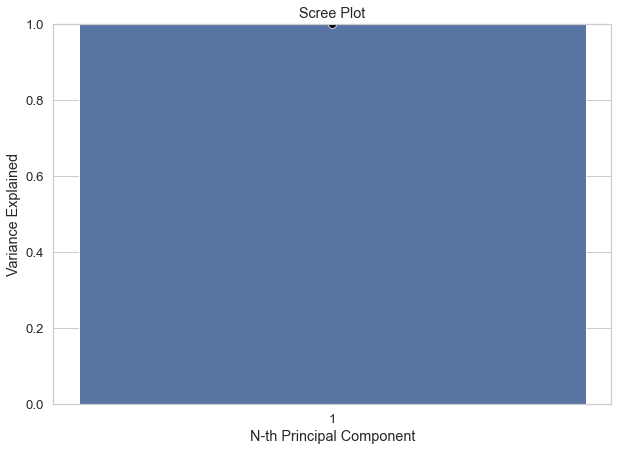

In [57]:
# Perform PCA (w/o limits on n_components)
pca = PCA()
_ = pca.fit_transform(y_test)
PC_components = np.arange(pca.n_components_) + 1

# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [36]:
# Feature Weight
_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(X_train.columns),
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

NameError: name 'pca' is not defined

In [58]:
# Perform PCA (Choose n_components to keep)
pca = PCA(n_components=20)
pca_array = pca.fit_transform(X_train)

# Convert back to DataFrame for readability
df_pca = pd.DataFrame(data=pca_array)
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca['label'] = y_train

df_pca.head()

PC1         PC2        PC3        PC4        PC5        PC6  \
0  2149.440906  250.892601  38.934810  24.269490 -13.254005   6.234335   
1  2133.922675 -450.167374  65.761784  17.362388  20.712711  14.593028   
2  2134.823445 -416.892510  92.625622  -5.745953  -8.137227 -16.096115   
3  2133.286672 -467.926623  28.342044 -13.971672  -6.949655   9.809435   
4  2149.376414  251.291581  -0.282270 -44.720053  -8.916690  -2.231444   

         PC7        PC8        PC9       PC10      PC11       PC12      PC13  \
0   0.259497   1.893435  30.270009   3.854562  3.048209  -4.959973 -2.239553   
1  -0.301706  -6.414478 -37.892854  -8.277209 -6.833208 -12.014705 -0.240941   
2  14.698371   0.375137   8.254727  10.630350  4.931159  -3.082823  2.323297   
3  13.344812 -23.588276  17.234099   5.049143  4.507565  -0.008297 -2.934936   
4  -2.011187 -12.806682  -5.657533   5.495028  5.555199   7.238193 -1.782387   

       PC14      PC15      PC16      PC17      PC18      PC19      PC20  label  
0  5.307903  4.313195 -1.622890  0.822882 -0.307946 -1.909475  1.586149      0  
1 -5.014054 -1.832432 -1.766957 -0.605516 -1.063553  3.581885  1.252539      0  
2 -5.496676  2.150618  3.009240  2.748797 -0.796989  0.941768 -2.365829      1  
3 -0.464431  4.476108 -0.983349  0.094824  1.541401 -0.166175 -2.361382      1  
4  4.547381 -0.574061 -0.272791 -0.177148  2.421147 -1.105232 -0.166547      1

In [ ]:
model = xgb.XGBClassifier(learning_rate = 0.001,
                max_depth = 9,n_estimators = 2500, alpha=5)

pca = PCA(n_components=35)

scale = StandardScaler()

pipe = make_pipeline(scale, pca, model)

pipe.fit(n_predictor_train, target_train['Winner_Red'])

pipe.score(n_predictor_test, target_test['Winner_Red'])

[00:22:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5761589403973509

In [ ]:
model = Perceptron(penalty='l2', alpha=0.01)

pca = PCA(n_components=41)

scale = StandardScaler()

pipe = make_pipeline(scale, pca, model)

pipe.fit(n_predictor_train, target_train['Winner_Red'])

pipe.score(n_predictor_test, target_test['Winner_Red'])

0.609271523178808

In [106]:
model = Perceptron(penalty='l2', alpha=0.01)

pca = PCA(n_components=1000)

scale = StandardScaler()

pipe = make_pipeline(scale, pca, model)

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.5161764705882353

In [109]:
model = Perceptron(penalty='l2', alpha=0.01)

pca = PCA(n_components=60)

scale = StandardScaler()

pipe = make_pipeline(scale, pca, model)

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.4485294117647059

In [118]:
from sklearn.decomposition import TruncatedSVD 

model = Perceptron(penalty='l2', alpha=0.01)

dr = TruncatedSVD(n_components=80, random_state=42)

scale = StandardScaler()

pipe = make_pipeline(scale, dr, model)

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.5794117647058824

In [121]:

model = xgb.XGBClassifier(learning_rate = 0.001,
                max_depth = 9,n_estimators = 2000, alpha=5)

dr = TruncatedSVD(n_components=80, random_state=42)

scale = StandardScaler()

pipe = make_pipeline(scale, dr, model)

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

[14:40:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5823529411764706

In [2]:
data

NameError: name 'data' is not defined